## what we are going to answer in that section

11. Is there a **significant difference** in average **ratings** between **top 3 product categories**?
    → (*ANOVA test*)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

from scipy.stats import (
    ttest_1samp, ttest_ind, ttest_rel,
    norm, chi2, f_oneway, chi2_contingency, chisquare
)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [3]:
df['category_clean'] = df['category'].apply(lambda x: x.split('|')[-1])
df.sort_values(by= 'category')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,2320.00,4000.0,0.42,3.8,1118.0,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...,AirPurifiers&Ionizers
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,299.94,4999.0,0.94,4.3,4426.0,【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...,USBtoUSBAdapters
742,B094DQWV9B,Kanget [2 Pack] Type C Female to USB A Male Ch...,Computers&Accessories|Accessories&Peripherals|...,147.63,399.0,0.63,4.0,1540.0,👍【USB C TO USB ADAPTER】-This is a USB C FEMALE...,"AFA6YM4NTFRGHHKYN5U7HUYEVSUA,AEB3EVUTQCHIE3PGI...","Abhi_K,Amazon Customer,Swap,shivam,Abhinav Sin...","R1QIWMR6C3F3U0,R1MSGOZTOMZE4B,R20OZCEE82GU0W,R...","Good and does it’s work,Nice product working a...",Using it to connect my type C Plantronic headp...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Kanget-Female-Adapter-St...,USBtoUSBAdapters
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,649.35,999.0,0.35,3.5,7222.0,Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...,PCHeadsets
748,B08SCCG9D4,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,940.00,2000.0,0.53,3.9,14969.0,Omnidirectional pickup pattern|3.5mm TRRS jack...,"AFROXVCIF6PZXFXLS7DLTPT2CGCQ,AHA4ODJMDNBNUVEUS...","Ansh KaTariA,Saqlain Shaikh,Sardar V.,Rushikes...","R20M6JOASW88SS,RPM4RV2MQNNN0,R19KRP5SDTN2NL,R1...","It's just good !,Good for WFH,Works according ...",It just good for beginners you can start your ...,https://m.media-amazon.com/images/I/41U9-x0JGP...,https://www.amazon.in/JBL-Commercial-Omnidirec...,PCMicrophones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,B00LOD70SC,Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,178.50,210.0,0.15,4.3,2450.0,Unique 3 dimple tip technology from Japan for ...,"AG3G7G2DUJKN5YMCOYZNCADKKJUQ,AH44B2X6AT45J37MH...","Madhusmita singh,Sandeep Singh,Jay OG,Asim,Vik...","R1AY8EXPHPWDDR,R24503W0UJGTMU,R27P97SD5T4MUX,R...","It's good,Good,One of the few items on amazon ...",Everything is fine but it's bit dark and stick...,https://m.media-amazon.com/images/I/31pJvN8OkS...,https://www.amazon.in/Pilot-Liquid-Roller-Ball...,RetractableBallpointPens
850,B07SBGFDX9,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts|OfficePaperProducts|Paper|Stati...,120.00,120.0,0.00,4.1,4308.0,"0.7 mm tip size|Black Body, Multicolor Ink(Bla...","AGK76H5VGHDWFQD7JTHVKZNQ5BHA,AHWXK2FU23OBRZZUA...","Parul S.,Prateek Tiwari,kateriki,golla 

In [4]:
df_clean = df[['category_clean', 'rating_count', 'rating']].dropna()


In [5]:
top3_categories= df_clean.value_counts('category_clean').head(3).reset_index()
categories= top3_categories['category_clean'].to_list()
categories

['USBCables', 'SmartWatches', 'Smartphones']

In [6]:
df_top3 = df_clean[df_clean['category_clean'].isin(categories)]
df_top3

,category_clean,rating_count,rating
0,USBCables,24269.0,4.2
1,USBCables,43994.0,4.0
2,USBCables,7928.0,3.9
3,USBCables,94363.0,4.2
4,USBCables,16905.0,4.2
...,...,...,...
990,USBCables,602.0,4.1
992,USBCables,1423.0,4.0
1000,USBCables,536.0,3.9
1010,USBCables,10576.0,4.2


In [7]:
df_sorted_top3= df_top3.sort_values(by='category_clean').reset_index().drop(columns='index')

In [8]:
df_sorted_top3

,category_clean,rating_count,rating
0,SmartWatches,7571.0,3.9
1,SmartWatches,17162.0,4.3
2,SmartWatches,21796.0,3.9
3,SmartWatches,5179.0,4.1
4,SmartWatches,154.0,4.1
...,...,...,...
370,USBCables,61.0,3.9
371,USBCables,491.0,4.1
372,USBCables,178817.0,4.1
373,USBCables,13552.0,4.4


In [9]:
cat1 = df_sorted_top3[df_sorted_top3['category_clean'] == df_sorted_top3['category_clean'].unique()[0]]['rating']
cat2 = df_sorted_top3[df_sorted_top3['category_clean'] == df_sorted_top3['category_clean'].unique()[1]]['rating']
cat3 = df_sorted_top3[df_sorted_top3['category_clean'] == df_sorted_top3['category_clean'].unique()[2]]['rating']

F-statistic: 9.909111985063653
p-value: 6.415718751633342e-05

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
SmartWatches Smartphones    0.075 0.1054 -0.0117 0.1617  False
SmartWatches   USBCables   0.1282    0.0  0.0595  0.197   True
 Smartphones   USBCables   0.0532 0.1889 -0.0184 0.1249  False
--------------------------------------------------------------


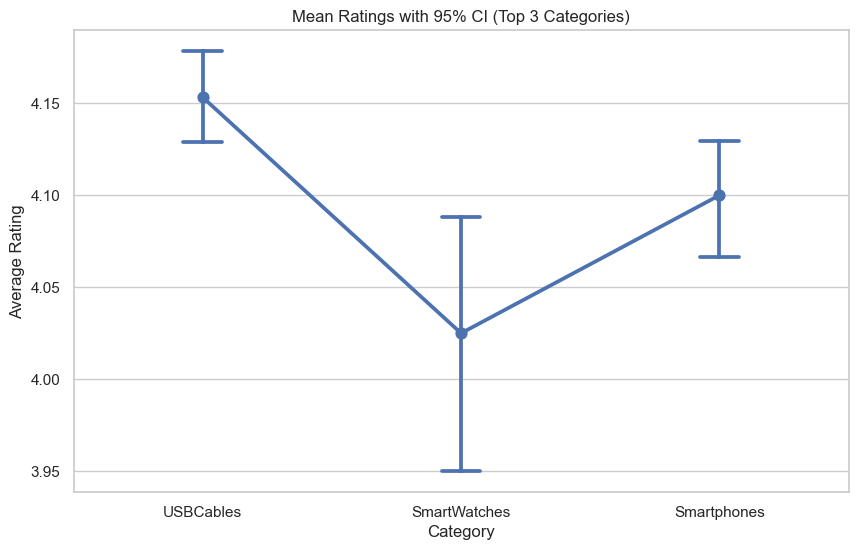

In [13]:
from scipy.stats import f_oneway

F, p = f_oneway(cat1, cat2, cat3)
print("F-statistic:", F)
print("p-value:", p )
print('')

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_top3['rating'],
                          groups=df_top3['category_clean'],
                          alpha=0.05)
print(tukey)


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.pointplot(
    data=df_top3,
    x='category_clean',
    y='rating',
    capsize=0.15,
    errorbar='ci'
)

plt.title("Mean Ratings with 95% CI (Top 3 Categories)")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()
